<a href="https://colab.research.google.com/github/KangHwan-Cha/MyStudy/blob/main/TensorProject/Category2B__DNN(Structured Data - Iris)-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.layers       import Dense
from tensorflow.keras.models       import Sequential
from tensorflow.keras.callbacks    import ModelCheckpoint

In [3]:
train_dataset = tfds.load('iris', split='train[:80%]')
valid_dataset = tfds.load('iris', split='train[80%:]')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\star2\tensorflow_datasets\iris\2.0.0.incompleteYJS7LH\iris-train.tfrecord*...:   0%|       …

Dataset iris downloaded and prepared to C:\Users\star2\tensorflow_datasets\iris\2.0.0. Subsequent calls will reuse this data.


In [8]:
# dataset 출력 및 전처리 실습
for data in train_dataset.take(5):
    x = data['features']
    y = data['label']
    y = tf.one_hot(y, 3)
    print(x, y, sep='\n')

tf.Tensor([5.1 3.4 1.5 0.2], shape=(4,), dtype=float32)
tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
tf.Tensor([7.7 3.  6.1 2.3], shape=(4,), dtype=float32)
tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
tf.Tensor([5.7 2.8 4.5 1.3], shape=(4,), dtype=float32)
tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor([6.8 3.2 5.9 2.3], shape=(4,), dtype=float32)
tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
tf.Tensor([5.2 3.4 1.4 0.2], shape=(4,), dtype=float32)
tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)


In [9]:
# 데이터 전처리 함수 생성
def preprocess(data):
    x = data['features']
    y = data['label']
    y = tf.one_hot(y, 3)
    return x, y

### batch size 설정

In [10]:
batch_size = 10   # specify batch size when you traing tensorflow certification

In [11]:
train_data = train_dataset.map(preprocess).batch(batch_size)
valid_data = valid_dataset.map(preprocess).batch(batch_size)

### Define Modeling

In [15]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(4, )),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # classfication을 위한 softmax, 클래스 갯수 = 3개
    Dense(3, activation='softmax'),
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 177,219
Trainable params: 177,219
Non-trai

### Compile

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

### Create Check point

In [18]:
checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                            save_weights_only=True,
                            save_best_only=True,
                            monitor='val_loss',
                            varbose=1)

### Fit

In [19]:
history = model.fit(train_data,
                    validation_data=(valid_data),
                    epochs=20,
                    callbacks=[checkpoint],
                    )


Epoch 1/20
12/12 [==============================] - 1s 32ms/step - loss: 0.8957 - acc: 0.5833 - val_loss: 0.6886 - val_acc: 0.6333
Epoch 2/20
12/12 [==============================] - 0s 9ms/step - loss: 0.4734 - acc: 0.8333 - val_loss: 0.3588 - val_acc: 0.8667
Epoch 3/20
12/12 [==============================] - 0s 9ms/step - loss: 0.2553 - acc: 0.9333 - val_loss: 0.2622 - val_acc: 0.9000
Epoch 4/20
12/12 [==============================] - 0s 5ms/step - loss: 0.1777 - acc: 0.9250 - val_loss: 0.2640 - val_acc: 0.9000
Epoch 5/20
12/12 [==============================] - 0s 9ms/step - loss: 0.1398 - acc: 0.9333 - val_loss: 0.2690 - val_acc: 0.9000
Epoch 6/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0987 - acc: 0.9583 - val_loss: 0.2172 - val_acc: 0.9000
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 0.1377 - acc: 0.9417 - val_loss: 0.2829 - val_acc: 0.9000
Epoch 8/20
12/12 [==============================] - 0s 8ms/step - loss: 0.0682 - acc: 0.9

In [20]:
model.load_weights(checkpoint_path)

### 검증

In [21]:
model.evaluate(valid_data)

3/3 [==============================] - 0s 3ms/step - loss: 0.1380 - acc: 0.9333


[0.1379873901605606, 0.9333333373069763]

### Visualizing loss and acc

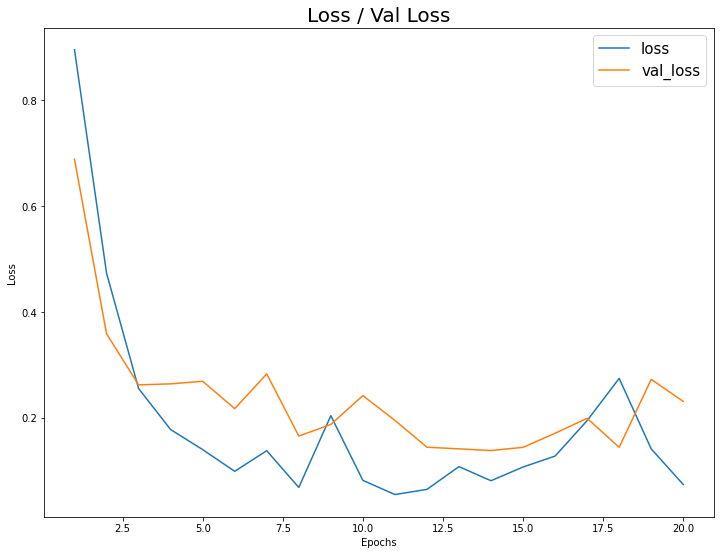

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

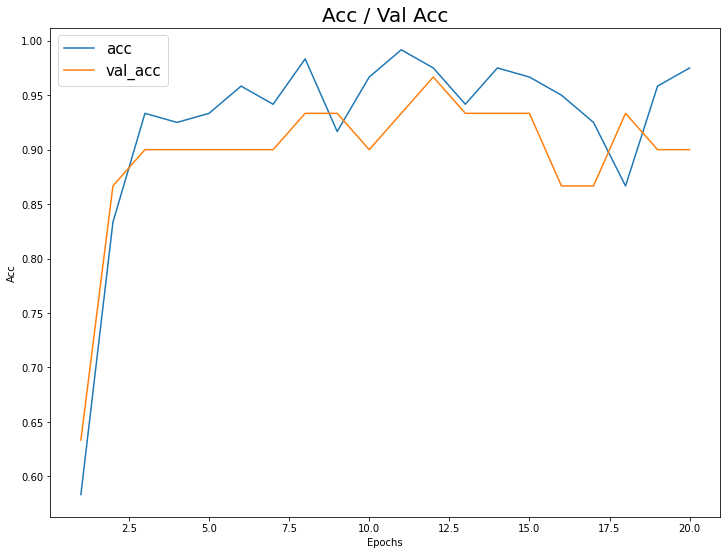

In [25]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()